# Cyberbullying Detection using Machine Learning - SVM, Logistic Regression, and Naive Bayes

This notebook demonstrates how to implement a cyberbullying detection model using three different machine learning algorithms: Support Vector Machine (SVM), Logistic Regression, and Naive Bayes. We'll be evaluating the performance of each model using metrics like accuracy, precision, recall, F1-score, and a confusion matrix.

---

## 1. Importing Required Libraries

First, we'll import the necessary libraries for data manipulation, model training, and evaluation.


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


## 2. Loading the Dataset

We'll load the dataset that contains text labeled as either cyberbullying or non-cyberbullying. Make sure you have the dataset downloaded and placed in your working directory.


In [14]:
# Load the dataset
data = pd.read_csv('C:\\Users\\Syed Arfath\\Downloads\\cyberbullying_tweets.csv\\cyberbullying_tweets.csv')


## 3. Exploring the Dataset

It's important to explore the dataset to understand its structure and the distribution of the labels.


In [27]:
# Explore the dataset
print(data.head(5))
print(data['cyberbullying_type'].value_counts())


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64


## 4. Preprocessing the Data

We'll separate the features (text) and labels, then split the dataset into training and testing sets. We'll also vectorize the text using TF-IDF to convert it into a numerical format suitable for model training.


In [32]:
# Preprocessing
X = data['tweet_text']  # Features
y = data['cyberbullying_type']  # Labels

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


## 5. Model 1: Support Vector Machine (SVM)

We'll start by training an SVM model with a linear kernel on the training data and then evaluate its performance on the test data.


In [35]:
# 1. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)


### SVM Performance Metrics

We'll evaluate the performance of the SVM model using a classification report and a confusion matrix. The classification report provides precision, recall, F1-score, and support for each class, while the confusion matrix helps visualize the number of correct and incorrect predictions.


SVM Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.98      0.98      0.98      1603
             gender       0.91      0.85      0.87      1531
  not_cyberbullying       0.64      0.54      0.59      1624
other_cyberbullying       0.62      0.76      0.68      1612
           religion       0.96      0.95      0.95      1566

           accuracy                           0.84      9539
          macro avg       0.85      0.84      0.84      9539
       weighted avg       0.84      0.84      0.84      9539

SVM Accuracy:  0.8412831533703743


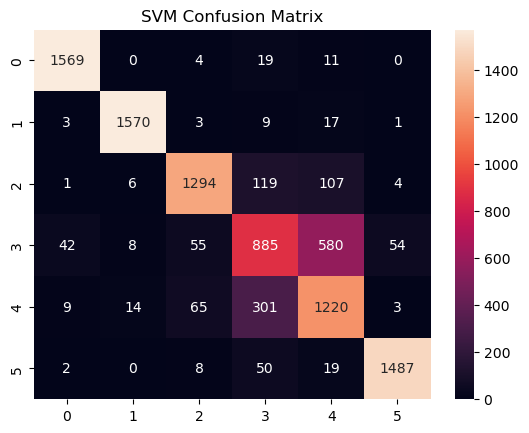

In [38]:
# SVM Metrics
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix')
plt.show()


## 6. Model 2: Logistic Regression

Next, we'll train a Logistic Regression model on the same data and evaluate its performance similarly.


In [44]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)


### Logistic Regression Performance Metrics

We'll generate the classification report and confusion matrix for the Logistic Regression model to understand how well it performs.


Logistic Regression Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.99      0.97      0.98      1603
             gender       0.90      0.83      0.87      1531
  not_cyberbullying       0.61      0.58      0.59      1624
other_cyberbullying       0.63      0.71      0.67      1612
           religion       0.95      0.95      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.84      0.84      9539
       weighted avg       0.84      0.83      0.84      9539

Logistic Regression Accuracy:  0.8342593563266589


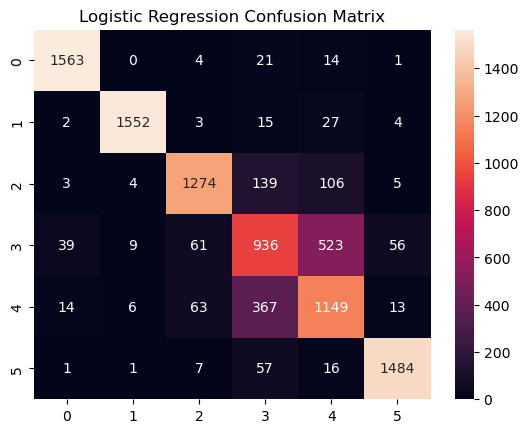

In [47]:
# Logistic Regression Metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## 7. Model 3: Naive Bayes

Finally, we'll train a Naive Bayes model on the data and evaluate its performance.


In [50]:
# 3. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)


### Naive Bayes Performance Metrics

As with the previous models, we'll assess the performance of the Naive Bayes model using a classification report and a confusion matrix.


Naive Bayes Classification Report:
                      precision    recall  f1-score   support

                age       0.78      0.97      0.87      1603
          ethnicity       0.88      0.89      0.89      1603
             gender       0.82      0.82      0.82      1531
  not_cyberbullying       0.69      0.44      0.54      1624
other_cyberbullying       0.63      0.61      0.62      1612
           religion       0.82      0.96      0.89      1566

           accuracy                           0.78      9539
          macro avg       0.77      0.78      0.77      9539
       weighted avg       0.77      0.78      0.77      9539

Naive Bayes Accuracy:  0.7790124751022119


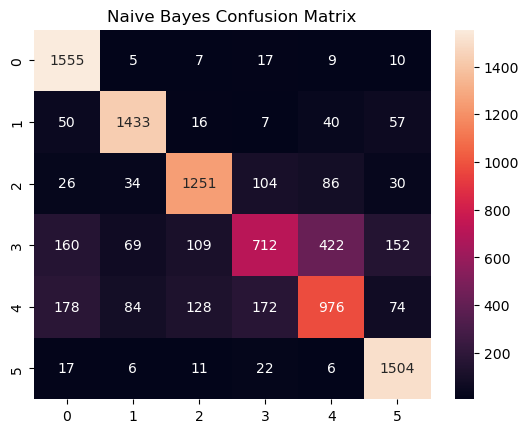

In [53]:
# Naive Bayes Metrics
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


## 8. Findings and comparison

In this notebook, we implemented three different machine learning algorithms—SVM, Logistic Regression, and Naive Bayes—to detect cyberbullying from text data. We evaluated the performance of each model using various metrics such as accuracy, precision, recall, F1-score, and confusion matrices. This analysis helps us understand which model performs best for this specific task and dataset.


In [59]:
# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print classification reports
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Print accuracy for each model
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Determine which model has the highest accuracy
if accuracy_svm > accuracy_logreg and accuracy_svm > accuracy_nb:
    print("The SVM model has the highest accuracy.")
elif accuracy_logreg > accuracy_svm and accuracy_logreg > accuracy_nb:
    print("The Logistic Regression model has the highest accuracy.")
else:
    print("The Naive Bayes model has the highest accuracy.")



SVM Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.98      0.98      0.98      1603
             gender       0.91      0.85      0.87      1531
  not_cyberbullying       0.64      0.54      0.59      1624
other_cyberbullying       0.62      0.76      0.68      1612
           religion       0.96      0.95      0.95      1566

           accuracy                           0.84      9539
          macro avg       0.85      0.84      0.84      9539
       weighted avg       0.84      0.84      0.84      9539

Logistic Regression Classification Report:
                      precision    recall  f1-score   support

                age       0.96      0.98      0.97      1603
          ethnicity       0.99      0.97      0.98      1603
             gender       0.90      0.83      0.87      1531
  not_cyberbullying       0.61      0.58      0.59      1624
other_cyb

## 10. User Testing
Let us now test the model on inputs provided by the user.

In [63]:
# User input for testing
def classify_input(text):
    # Transform the input text
    text_tfidf = vectorizer.transform([text])

    # Predictions from all three models
    prediction_svm = svm.predict(text_tfidf)[0]
    prediction_logreg = logreg.predict(text_tfidf)[0]
    prediction_nb = nb.predict(text_tfidf)[0]

    print(f"\nPredictions for the input text:")
    print(f"SVM Prediction: {'Cyberbullying' if prediction_svm else 'Not Cyberbullying'}")
    print(f"Logistic Regression Prediction: {'Cyberbullying' if prediction_logreg else 'Not Cyberbullying'}")
    print(f"Naive Bayes Prediction: {'Cyberbullying' if prediction_nb else 'Not Cyberbullying'}")

# Test with user input
user_input = input("Enter a text to check for cyberbullying: ")
classify_input(user_input)


Enter a text to check for cyberbullying:  Ajay and himavanth are gays lol they should be killed those fuckers they are bad and assholes



Predictions for the input text:
SVM Prediction: Cyberbullying
Logistic Regression Prediction: Cyberbullying
Naive Bayes Prediction: Cyberbullying
